# <font color ='red'> Soccer Data Tale</font>

In [ ]:
# Description about what is soccer and the game , how it emerged, fifa game and so on...
Soccer (called football in most of the world) is considered to be the world's most popular sport. In soccer there are two teams
of eleven players. Soccer is played on a large grass field with a goal at each end. The object of the game is to get the soccer
ball into the opposing team's goal. The key to soccer is that, except the goalie, players cannot touch the ball with their hands
, they can only kick, knee, or head the ball to advance it or score a goal.Perhaps the most famous soccer tournament is the 
World Cup. Held every four years, the World Cup is a soccer competition among countries and is one of the most watched events
in the world. 

## <font color ='orange'> Problem Statement </font>

Soccer Data Tale:

Description: This European Soccer dataset contains the information of various football matches conducted in the period from 2007 to 2016 in which around 11000 players are involved.
This dataset contains 41 features which includes 
player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes.

id: The id in our dataset is just a serial number and can be ignored.            
player_fifa_api_id : Players application Id while playing for the FIFA matches.     
player_api_id      : Players application Id while playing for normal matches.       
date               : The date on which the match was conducted.
overall_rating     : The performance of the player estimated in terms of rating and is calculated based on various other factors stated below. This was the target feature in our dataset and our aim is to estimate the
potential          : The estimate of the players capability for the future.              
preferred_foot     : Foot the players will be using most of the times for shooting,passing etc.,         
attacking_work_rate: The attacking_work_rate of the players depends on the extent to which the player plays in attacking roles.     
defensive_work_rate: The defensive_work_rate of the players depends on the extent to which the player plays in defensive roles.
crossing           : Mostly wingers or fullbacks lob pass to forward players similar to air passes.           
finishing          : Ability of the player to convert the passes to goals in match.
heading_accuracy   : Similar to finishing but the players uses their head in setting the goal.      
short_passing      : Players ability in passing the ball to nearest players.      
volleys            : A volley is an air-borne strike in association football, where a player's foot meets and directs the ball in an angled direction before it has time to reach the ground.      
dribbling          : Players attempt to propel the ball toward their opponents' goal through individual control of the ball      
curve              : Players ability to bend the ball while going for freekick or long passing.      
free_kick_accuracy : Ability of the pplayer to convert the Number of free kicks to goals.     
long_passing       :  Players ability in passing the ball to the teammate at longer range.  
ball_control       :  To control the ball the players receives in any pass.
acceleration       : Acceleration is what helps players get past their opponents quickly.     
sprint_speed       : The speed with which the player moves in between the posiitons     
agility            : Ability to change the direction of body with the combination of speed, strength, coordination and balance.     
reactions          : How the players reacts to certain situations in the game    
balance            : Players ability in controlling the ball while running at higher speeds.     
shot_power         : How hard the player hit the ball to make a goal
jumping            : How high the player jumps to take the ball     
stamina            : Depends on the ability of the player to run continuously in the game.      
strength           : Physical aspect of the player with which he can grab the ball from opponent.     
long_shots         : Players ability to aim for the goal from longer distances.     
aggression         : It should be high for the defenders and can be defined as players ability in grabbing the ball from atttacker with very high intensity.Aggression must be confined within the rules of the game.
interceptions      : Intelligence of the player with which he can predict the opposition moves and hijacks their passes.      
positioning        : Players intelligence in estimating the ball positions.     
vision             :  A player with good vision will quickly scan the field and find a better pass     
penalties          :  Penalty is a sanction called against a team for a violation of the rules
marking            :  Marking is an organized defensive strategy which aims to prevent a member of the opposing team (usually a striker) from taking control of the ball.   
standing_tackle    :  The player remains on his foot and tackles the ball from opponent player
sliding_tackle     :  The player tackles the ball from the opponent player from 
gk_diving          : Goal Keeper ability in diving for stoping the goal     
gk_handling        : Goal Keeper ability in catching the ball or punching it to their teammate     
gk_kicking         : Accuracy at which the Goal Keeper kicks the ball to his teammate at upfield      
gk_positioning     : Goal Keeper intelligence in estimating the positions where the ball may land     
gk_reflexes        : Goal Keeper spontaneity in estimating the ball landing after taking deflections.
Problem Statement:
By doing the analysis on the dataset, we need to effectively predict the feature 'overall_rating' given the remaning features.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import copy
pd.options.display.max_rows=40
pd.options.display.max_columns=45
from scipy.stats import mode
from sklearn import preprocessing
import warnings
warnings.simplefilter(action='ignore', category = FutureWarning)
warnings.simplefilter(action='ignore', category = DeprecationWarning)
warnings.simplefilter(action='ignore', category = UserWarning)


By default system will consider only Standard Missing Values like NaN,NA,'', as null values.
Inorder to handle different null values effectively we have maintained a list called 'missing_values'.

In [9]:
missing_values=['','NaN','n/a','na',' ','NA','_0','0','None']


### <font color='orange'> Understanding Data</font>

Along with reading the data, the missing values are also assigned to the function 'read_csv'.

In [10]:
soccer_raw_data=pd.read_csv('file:///C:\\Users\\u%20s%20e%20r\\Desktop\\Intern\\Soccer_player\\8.soccer_players\\soccer_data.csv', na_values=missing_values)


In [11]:
soccer_raw_data.shape

(183978, 43)

In [12]:
# Describe  no of rows and cols in the data

In [13]:
soccer_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 43 columns):
Unnamed: 0             183977 non-null float64
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    177109 non-null object
defensive_work_rate    180551 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_c

In [14]:
#  No of data types used in data

In [15]:
# Display entire columns of the data in the head function

In [16]:
soccer_raw_data.head()

,Unnamed: 0,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,NaN,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1.0,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,2.0,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,3.0,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,4.0,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [12]:
# Provide explaination to each column names

Features like id,player_fifa_api_id,player_api_id,date are very unique and does not constitute to overall_rating of the players.
So, removing these features.

In [17]:
soccer_data=soccer_raw_data.iloc[:,5:]


In [18]:
soccer_data.shape


(183978, 38)

After removing the unwanted features like  id,player_fifa_api_id,player_api_id,date we are left with 37 independent features that accounts for the one target feature 

In [16]:
soccer_data.head()

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [19]:
soccer_data.describe() 

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,181265.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,59.175154,52.965675,49.380950,57.069880,63.388879,67.659357,68.051244,65.970910,66.103706,65.189496,61.808427,66.969045,67.038544,67.424529,53.339431,60.948046,52.009271,55.786504,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,17.744688,18.255788,17.831746,14.394464,15.196671,12.983326,12.569721,12.954585,9.155408,13.063188,16.135143,11.006734,13.165262,12.072280,18.367025,16.089521,19.450133,18.448292,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,3.000000,5.000000,10.000000,12.000000,11.000000,17.000000,12.000000,2.000000,14.000000,10.000000,10.000000,1.000000,6.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,52.000000,41.000000,36.000000,49.000000,58.000000,61.000000,62.000000,58.000000,61.000000,58.000000,54.000000,60.000000,61.000000,60.000000,41.000000,51.000000,34.000000,45.000000,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,56.000000,50.000000,59.000000,67.000000,69.000000,69.000000,68.000000,67.000000,67.000000,65.000000,68.000000,69.000000,69.000000,58.000000,64.000000,57.000000,60.000000,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,67.000000,63.000000,67.000000,73.000000,77.000000,77.000000,75.000000,72.000000,74.000000,73.000000,74.000000,76.000000,76.000000,67.000000,73.000000,68.000000,69.000000,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,97.000000,94.000000,97.000000,97.000000,97.000000,97.000000,97.000000,96.000000,96.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,97.000000,96.000000,96.000000,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


### <font color='orange'>Data Cleaning </font>

In [ ]:
#Finding null values count per each feature.
# Plot missing values using  package missingno

In [41]:
null_count=pd.DataFrame(data=soccer_data.isnull().sum(),columns=['counts'])

In [54]:
!pip install plotly
import plotly.offline as po
import plotly.graph_objects as go

In [68]:
data=[go.Bar(
    
    x=null_count.index,
    y=null_count.counts)
    
]

In [76]:
layout=go.Layout(title='Null count per feature',xaxis=dict(title='index'),yaxis=dict(title='counts'),hovermode='closest')
fig=go.Figure(data=data,layout=layout)

fig.show()

Let us drop the records which have null values present across all features.

In [79]:
soccer_rem_null=soccer_data.dropna(how='all')


Checking for the data left over !!!!

In [80]:
soccer_rem_null.shape


(183142, 38)

Let's retain only the unique records.

In [81]:
soccer_rem_dup=soccer_rem_null.drop_duplicates()

Data  looks like this after eliminating duplicates from it

In [83]:
soccer_rem_dup.shape

(138439, 38)

In [90]:
soccer_rem_dup_null_count=data=soccer_rem_dup.isnull().sum().sort_values(ascending=False).to_frame('null_count')
soccer_rem_dup_null_count

,null_count
attacking_work_rate,4770
defensive_work_rate,1965
agility,1481
balance,1481
sliding_tackle,1481
jumping,1481
vision,1481
curve,1481
volleys,1481
dribbling,0


In [92]:
data=[go.Bar(
    
    x=soccer_rem_dup_null_count.index,
    y=soccer_rem_dup_null_count.null_count)
    
]
layout=go.Layout(title='Null count per feature after dropping null records and duplicate records',xaxis=dict(title='index'),yaxis=dict(title='null_count'),hovermode='closest')
fig=go.Figure(data=data,layout=layout)

fig.show()

Extracting numerical and categorical features from the data

In [93]:
numerical_var = []
for var in soccer_rem_dup.select_dtypes(['int64','float64']):
    numerical_var.append(var)

In [94]:
numerical_var

['overall_rating',
 'potential',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'free_kick_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes']

Imputing the null values present in Numerical Variables using "SimpleImputer" method

In [107]:
from sklearn.impute import SimpleImputer

Inorder to access this "SimpleImputer" method we need to assign it to a variable

In [108]:
num_si=SimpleImputer()


"fit_transform" function performs the two operations respectively:- Firstly, it fits the parameters on the data and thereby transforms it into an array. SimpleImputer too makes use of this function.

In [112]:
imputed_numerical_soccer=num_si.fit_transform(soccer_rem_dup[numerical_var])

Now, all the null values in each numerical column is replced by column mean.
Passing the transformed columns to a dataframe.

In [113]:
imputed_numerical_soccer=pd.DataFrame(imputed_numerical_soccer,columns=numerical_var)

In [114]:
imputed_numerical_soccer.head()
# Now we can see none of the columns are having the null values.

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
2,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
3,74.0,76.0,80.0,53.0,58.0,71.0,40.0,73.0,70.0,69.0,68.0,71.0,79.0,78.0,78.0,67.0,90.0,71.0,85.0,79.0,56.0,62.0,68.0,67.0,60.0,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
4,74.0,76.0,80.0,53.0,58.0,71.0,32.0,73.0,70.0,69.0,68.0,71.0,79.0,78.0,78.0,67.0,90.0,71.0,85.0,79.0,56.0,60.0,68.0,67.0,60.0,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0


In [115]:
imputed_numerical_soccer.isnull().sum().sort_values(ascending=False)

gk_reflexes           0
curve                 0
agility               0
sprint_speed          0
acceleration          0
ball_control          0
long_passing          0
free_kick_accuracy    0
dribbling             0
balance               0
volleys               0
short_passing         0
heading_accuracy      0
finishing             0
crossing              0
potential             0
reactions             0
shot_power            0
gk_positioning        0
penalties             0
gk_kicking            0
gk_handling           0
gk_diving             0
sliding_tackle        0
standing_tackle       0
marking               0
vision                0
jumping               0
positioning           0
interceptions         0
aggression            0
long_shots            0
strength              0
stamina               0
overall_rating        0
dtype: int64

In [116]:
cat_var = []
for var in soccer_rem_dup.select_dtypes(['object']):
    cat_var.append(var)

Imputing null values present in Categorical Variables with "Mode"

In [177]:
soccer_rem_dup[cat_var] = soccer_rem_dup[cat_var].fillna(soccer_rem_dup.mode().iloc[0])

C:\Users\u s e r\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [178]:
soccer_rem_dup[cat_var].isnull().sum()

preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
dtype: int64

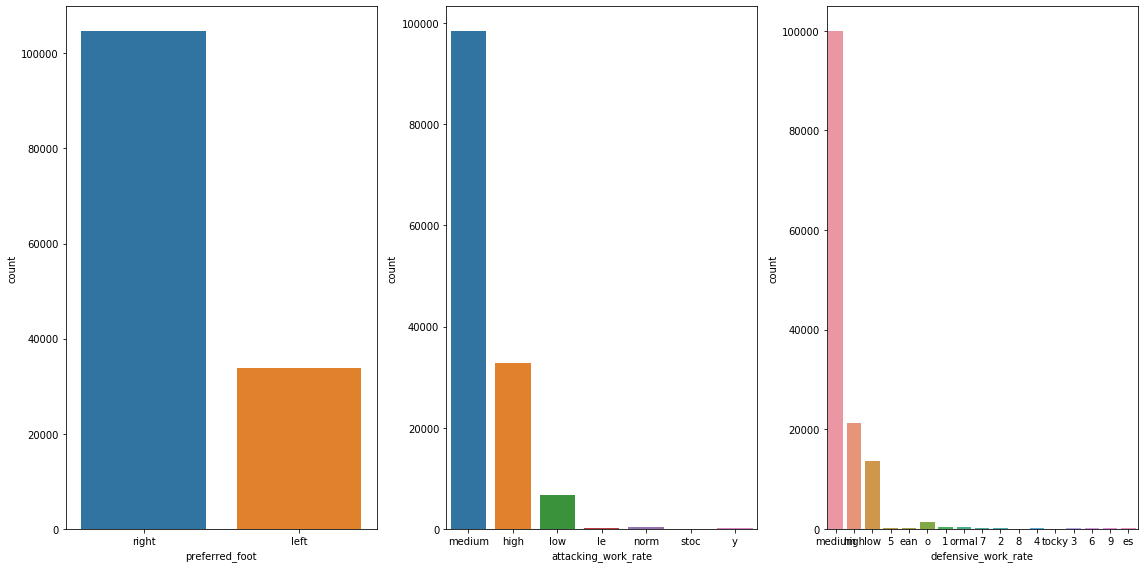

In [197]:

#cat_type=[]
#for i,j in enumerate(soccer_rem_dup.select_dtypes(include=['object'])):
    #cat_type.append((soccer_rem_dup[j].value_counts()/soccer_rem_dup[j].count())*100)
    #cat_type.append(soccer_rem_dup[j].value_counts())
#cat_type 
fig,ax2=plt.subplots(nrows=1,ncols=3,figsize=(16,8),squeeze=False)

for i,j in enumerate(soccer_rem_dup.select_dtypes(include=['object'])):
    sns.countplot(x=j,data=soccer_rem_dup,ax=ax2[int(i/3)][i%3])
    
fig.tight_layout()

We see that three main categories Medium,high,low constitutes nearly 98% in defensive_work_rate and 100% in attacking_work_rate.
So considering the remaining categories like 0,1,2,3,...9,ormanl,tocky,ean,es as wrong entries and transforming those very few categories to existing low ,medium,high categories.

In [183]:
imputed_cat_soccer=copy.deepcopy(soccer_rem_dup.select_dtypes(include=['object']))
low_values=['0','1','2','3','_0','o','le']
medium_values=['ean','es','ormal','4','5','6','7','tocky','norm','stoc','y']
high_values=['8','9','10']


In [184]:
for cols in cat_var:
    imputed_cat_soccer[cols].replace(to_replace=low_values,value='low', inplace = True)
    imputed_cat_soccer[cols].replace(to_replace=medium_values,value='medium',inplace=True)
    imputed_cat_soccer[cols].replace(to_replace=high_values,value='high',inplace=True)       

In [185]:
imputed_cat_soccer=imputed_cat_soccer.reset_index(drop=True)

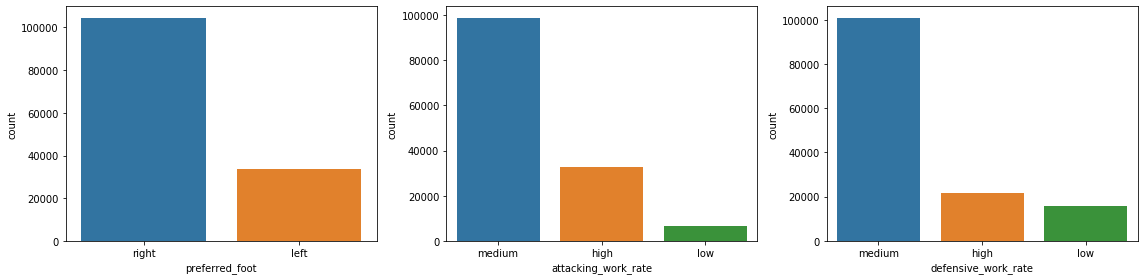

In [194]:
#cat_type=[]
#for i,j in enumerate(imputed_cat_soccer):
    #cat_type.append(imputed_cat_soccer[j].value_counts())
#cat_type 
fig,ax2=plt.subplots(nrows=1,ncols=3,figsize=(16,4),squeeze=False)

for i,j in enumerate(imputed_cat_soccer.select_dtypes(include=['object'])):
    sns.countplot(x=j,data=imputed_cat_soccer,ax=ax2[int(i/3)][i%3])
    
fig.tight_layout()
#Now we can see that the Categorical Variables are cleaned and consists only limited types.

In [198]:
#Now concat both data1_cat_modified and transformed_numerical_data1
soccer_imputed=pd.concat([imputed_cat_soccer,imputed_numerical_soccer],axis=1)
soccer_imputed.shape

(138439, 38)

In [199]:
soccer_imputed.describe()


,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.00000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000
mean,69.295061,73.996923,55.524643,50.194331,57.772940,62.962149,49.890959,59.483469,53.319543,49.783175,57.636735,63.859642,67.843722,68.279379,66.125754,66.799493,65.326626,62.298948,67.318017,67.552727,67.941310,53.768317,61.619276,52.901437,56.317309,58.517283,55.459061,47.33016,50.929081,48.510397,14.951271,16.334595,21.822911,16.406453,16.741020
std,6.861178,6.552489,17.462248,19.284744,16.782279,14.300325,18.444284,17.972028,18.390944,18.073022,14.436630,15.352938,13.045581,12.637135,12.869660,9.002952,13.038352,16.213859,10.908985,13.156366,11.919905,18.568573,16.058549,19.608281,18.719064,15.117687,15.752390,21.56854,21.762017,21.789945,17.305276,16.278454,22.209866,16.526526,17.642358
min,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,3.000000,5.000000,10.000000,12.000000,11.000000,17.000000,12.000000,2.000000,14.000000,10.000000,10.000000,1.000000,6.000000,1.000000,2.000000,1.000000,2.000000,1.00000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,65.000000,69.000000,46.000000,34.000000,50.000000,58.000000,36.000000,52.000000,41.000000,37.000000,50.000000,59.000000,61.000000,62.000000,59.000000,62.000000,58.000000,55.000000,61.000000,62.000000,61.000000,42.000000,52.000000,35.000000,45.000000,50.000000,46.000000,25.00000,29.000000,26.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,69.000000,74.000000,60.000000,53.000000,60.000000,66.000000,53.000000,64.000000,56.000000,51.000000,60.000000,67.000000,69.000000,70.000000,68.000000,67.000000,67.000000,66.000000,68.000000,70.000000,69.000000,58.000000,65.000000,58.000000,61.000000,61.000000,57.000000,52.00000,57.000000,54.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,74.000000,78.000000,68.000000,66.000000,69.000000,72.000000,64.000000,72.000000,67.000000,64.000000,68.000000,74.000000,77.000000,77.000000,75.000000,73.000000,74.000000,74.000000,74.000000,76.000000,76.000000,68.000000,74.000000,69.000000,70.000000,69.000000,67.000000,67.00000,70.000000,68.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,97.000000,94.000000,97.000000,97.000000,97.000000,97.000000,97.000000,96.000000,96.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,97.000000,96.000000,96.000000,97.000000,96.000000,96.00000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [200]:
soccer_imputed.isnull().sum()

preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
overall_rating         0
potential              0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0
gk_positioning         0
gk_reflexes            0
dtype: int64

<h2>Exploratory  Data Analysis</h2>

<h4> Univariate Analysis</h4>

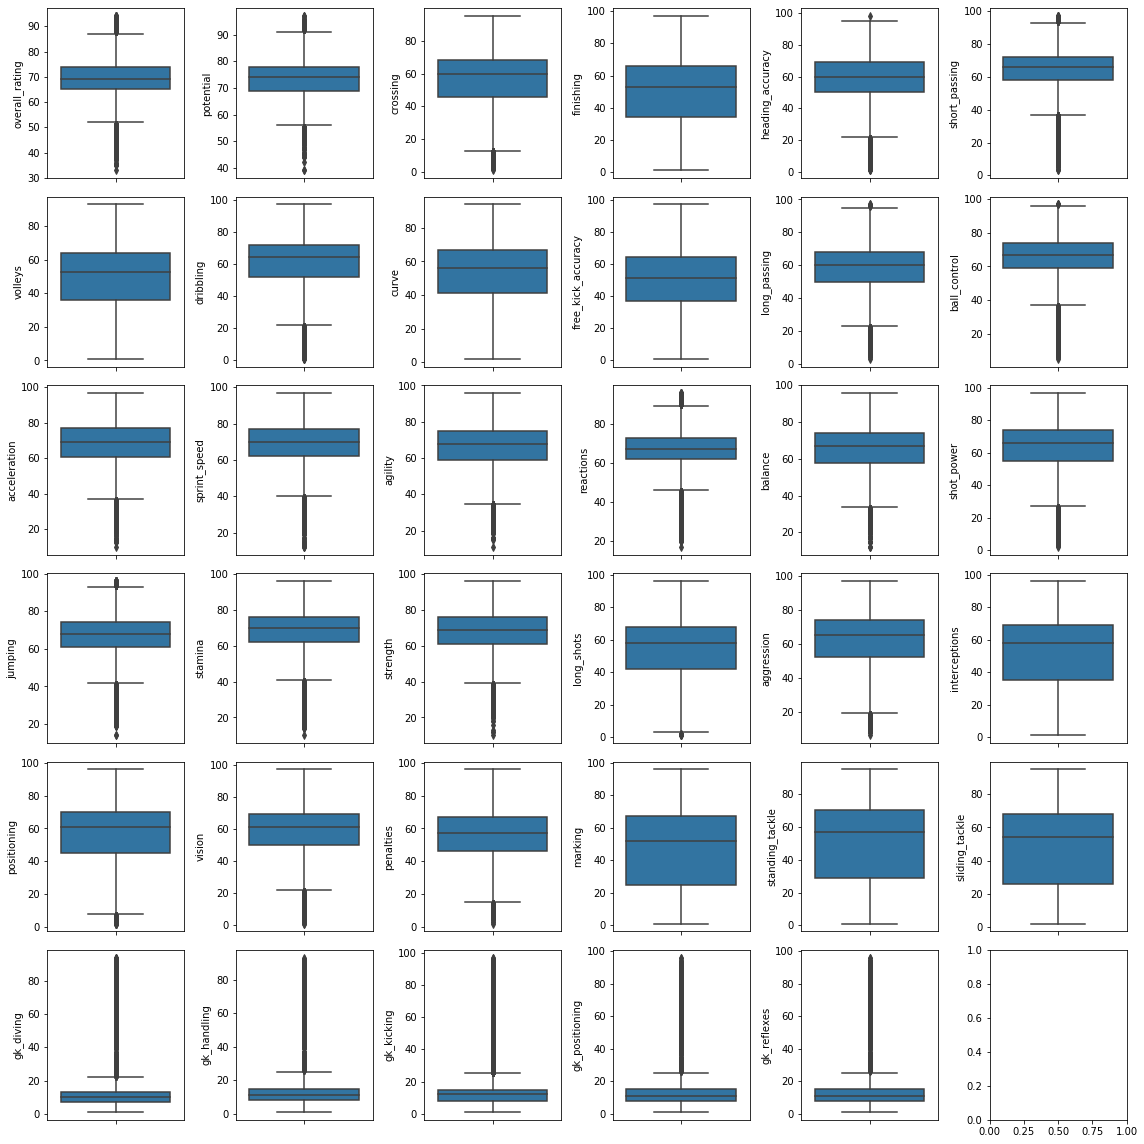

In [208]:
fig,ax4=plt.subplots(ncols=6,nrows=6,figsize=(16,16))
for i,j in enumerate(soccer_imputed.select_dtypes(include=['int','float'])):
    sns.boxplot(soccer_imputed.loc[:,j],ax=ax4[int(i/6)][i%6],orient='v')
fig.tight_layout()
#Boxplot is used to view the outliers peresent in the feature.

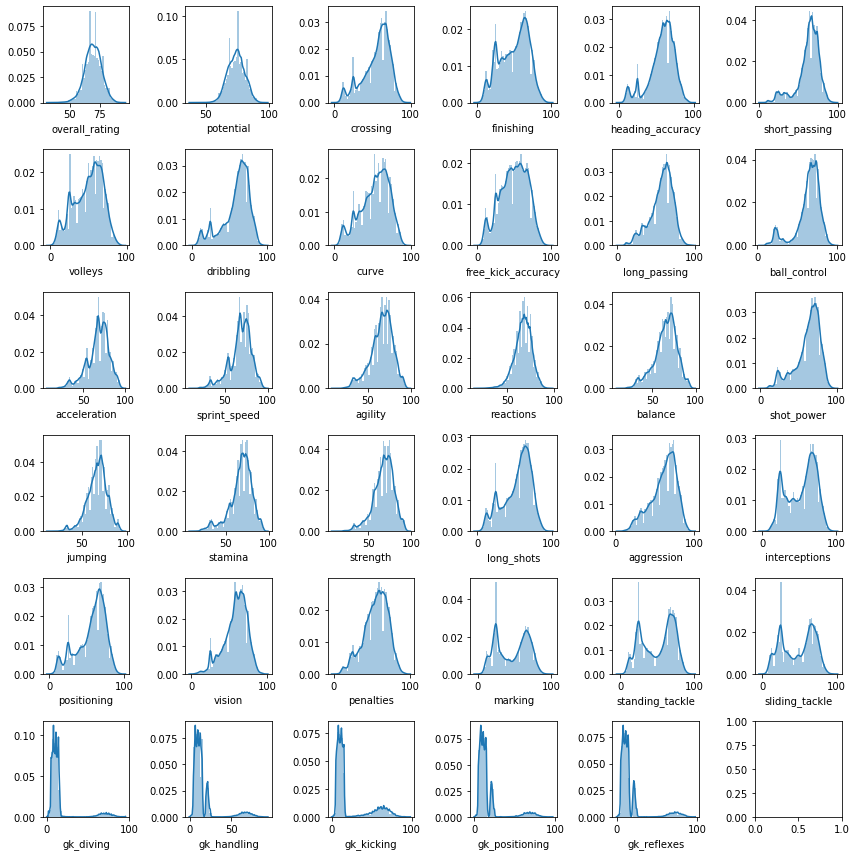

In [203]:
fig,ax5=plt.subplots(ncols=6,nrows=6,figsize=(12,12))
for i,j in enumerate(soccer_imputed.select_dtypes(include=['int','float'])):
    sns.distplot(soccer_imputed.loc[:,j],hist=True,ax=ax5[int(i/6)][i%6])
fig.tight_layout()
#Here we can observe the distributions of all the numercal features.


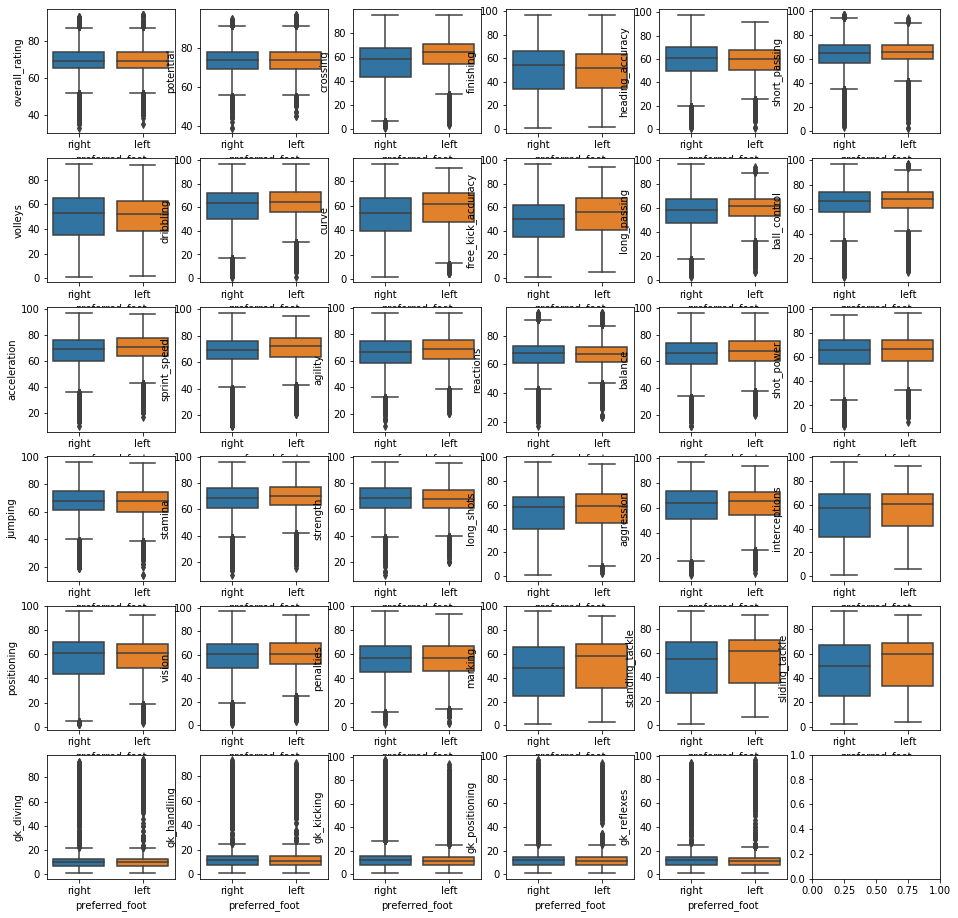

In [211]:
fig,ax5=plt.subplots(nrows=6,ncols=6,figsize=(16,16))
for i,j in enumerate(soccer_imputed.select_dtypes(include=['int64','float64'])):
    sns.boxplot(data=soccer_imputed,x='preferred_foot',y=j,ax=ax5[int(i/6)][i%6])
#defensive_work_rate against all the Numerical features.

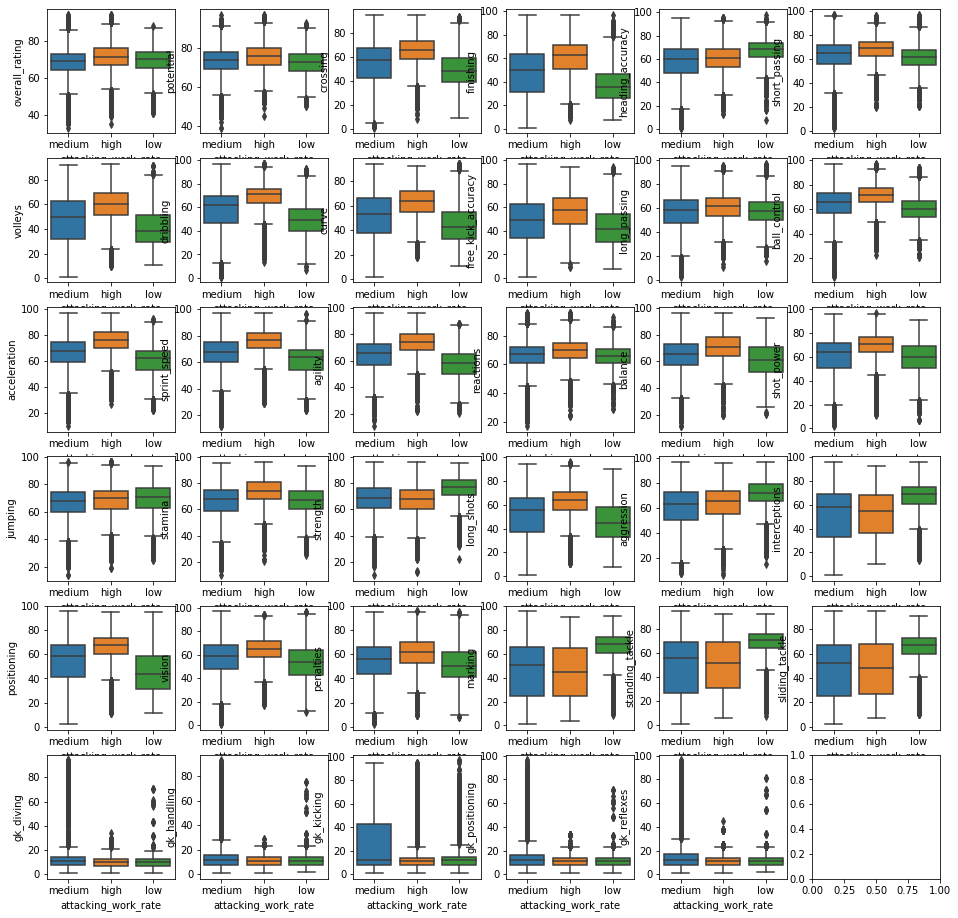

In [212]:

fig,ax4=plt.subplots(nrows=6,ncols=6,figsize=(16,16))
for i,j in enumerate(soccer_imputed.select_dtypes(include=['int64','float64'])):
    sns.boxplot(data=soccer_imputed,x='attacking_work_rate',y=j,ax=ax4[int(i/6)][i%6])
#Attacking_work_rate against all the Numerical features.


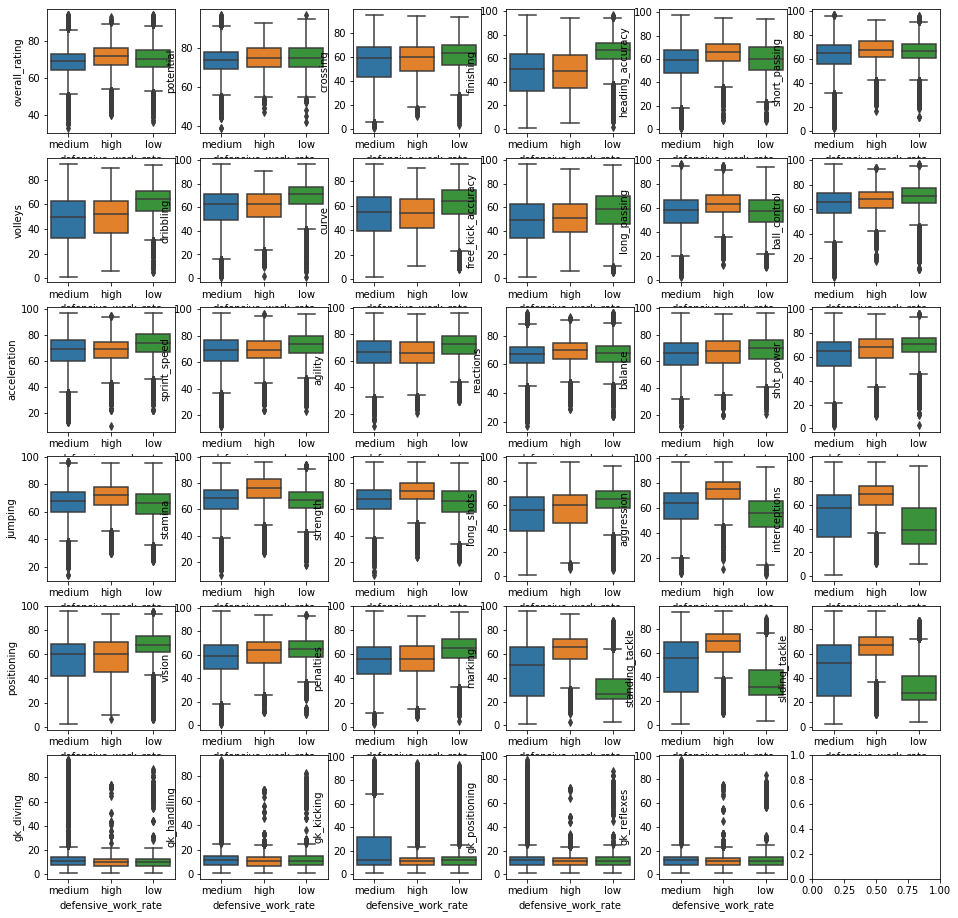

In [213]:
fig,ax5=plt.subplots(nrows=6,ncols=6,figsize=(16,16))
for i,j in enumerate(soccer_imputed.select_dtypes(include=['int64','float64'])):
    sns.boxplot(data=soccer_imputed,x='defensive_work_rate',y=j,ax=ax5[int(i/6)][i%6])
#defensive_work_rate against all the Numerical features.

<h4>Working with Outliers</h4>

In [216]:
z_score=np.abs(stats.zscore(soccer_imputed[numerical_var]))
z_score
#This array consists of the ascores of all the data

array([[0.3345008 , 0.45737334, 0.37364412, ..., 0.53232891, 0.50866611,
        0.49545821],
       [1.06324122, 1.22044493, 0.37364412, ..., 0.53232891, 0.50866611,
        0.49545821],
       [1.20898931, 1.37305924, 0.43091073, ..., 0.5773541 , 0.56917511,
        0.55214018],
       ...,
       [1.12298005, 0.91615553, 1.05802097, ..., 2.30425851, 0.21744192,
        0.18472544],
       [1.26872813, 1.06876985, 1.05802097, ..., 2.30425851, 0.21744192,
        0.18472544],
       [1.5602243 , 1.06876985, 1.05802097, ..., 2.5293845 , 0.56917511,
        0.09868442]])

In [217]:
soccer_data_in=soccer_imputed[(z_score<3).all(axis=1)]
#considering the data tha lies in 3 standard deviations

In [218]:
soccer_data_in.head()

,preferred_foot,attacking_work_rate,defensive_work_rate,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,right,medium,medium,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,right,medium,medium,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
2,right,medium,medium,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
3,left,high,medium,74.0,76.0,80.0,53.0,58.0,71.0,40.0,73.0,70.0,69.0,68.0,71.0,79.0,78.0,78.0,67.0,90.0,71.0,85.0,79.0,56.0,62.0,68.0,67.0,60.0,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
4,left,high,medium,74.0,76.0,80.0,53.0,58.0,71.0,32.0,73.0,70.0,69.0,68.0,71.0,79.0,78.0,78.0,67.0,90.0,71.0,85.0,79.0,56.0,60.0,68.0,67.0,60.0,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0


In [219]:
soccer_data_in.shape
#Now we can observe the decrese in the number of rows as the outliers are deleted from the dataset


(123660, 38)

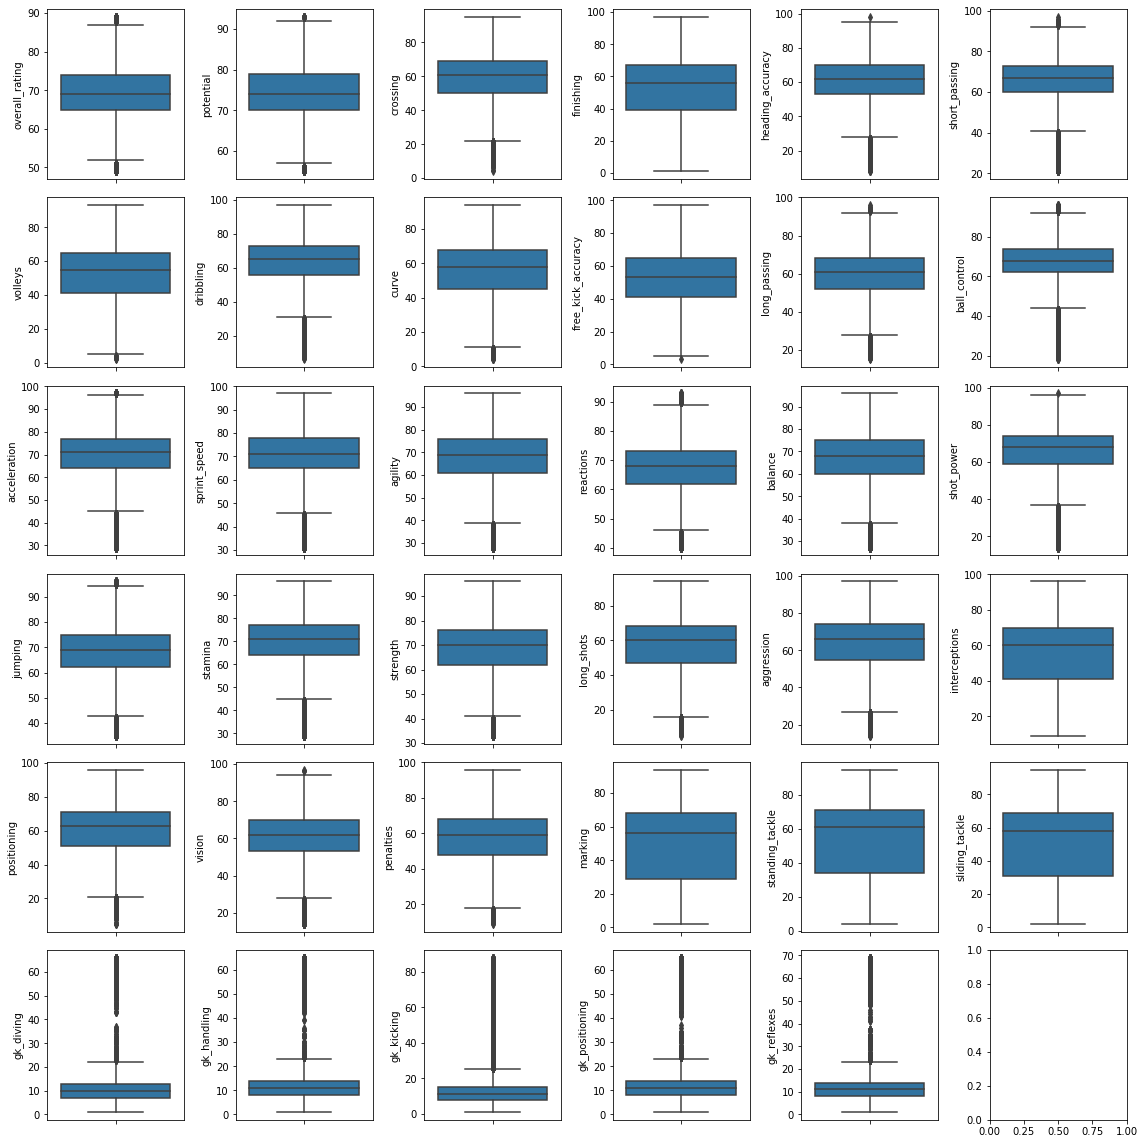

In [221]:
fig,ax6=plt.subplots(nrows=6,ncols=6,figsize=(16,16))

for i,j in enumerate(soccer_data_in.select_dtypes(include=['int64','float64'])):
    sns.boxplot(y=j,data=soccer_data_in,ax=ax6[int(i/6)][i%6], orient='v')
fig.tight_layout()
#After removing the data that lies out of 3 standard deviations.

<h2>Data Preprocessing</h2>

<h4>Encoding the categorical data</h4>

In [222]:
soccer_data_in_dummy = pd.get_dummies(soccer_data_in[cat_var], prefix_sep='_',drop_first=True)
soccer_data_in_dummy.head()
#As the model would perform better with the numerical data,Creating the dummy data for the categorical variables using pd.get_dummies

,preferred_foot_right,attacking_work_rate_low,attacking_work_rate_medium,defensive_work_rate_low,defensive_work_rate_medium
0,1,0,1,0,1
1,1,0,1,0,1
2,1,0,1,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [223]:
soccer_data_in_dummy.shape

(123660, 5)

<h4>Normalising Numerical Features</h4>

In [224]:
from sklearn.preprocessing import StandardScaler

In [225]:
scaler=StandardScaler()

In [226]:
soccer_data_in_norm=pd.DataFrame(data=scaler.fit_transform(soccer_data_in.select_dtypes(include=['int64','float64'])),columns=numerical_var)
soccer_data_in_norm.shape

(123660, 35)

In [227]:
soccer_data_in_norm.head()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,-0.364236,-0.489014,-0.694774,-0.518603,0.773876,-0.498921,-0.532519,-0.877374,-0.729853,-0.846209,0.350642,-1.787874,-0.892095,-0.600584,-0.754062,-2.400851,-0.165940,-0.790606,-0.992927,-1.532173,0.654545,-1.383297,0.496904,0.799338,-0.920198,-0.529076,-0.712890,0.727905,0.742951,0.857388,-0.758166,-0.157815,-0.433392,-0.622577,-0.597542
1,-1.119201,-1.269353,-0.694774,-0.518603,0.773876,-0.498921,-0.532519,-0.877374,-0.729853,-0.846209,0.350642,-1.787874,-0.892095,-0.600584,-0.754062,-2.400851,-0.165940,-0.790606,-0.992927,-1.532173,0.654545,-1.383297,-0.068531,-0.780485,-0.920198,-0.529076,-0.712890,0.727905,0.595181,0.857388,-0.758166,-0.157815,-0.433392,-0.622577,-0.597542
2,-1.270194,-1.425420,-0.765748,-0.576134,0.694140,-0.598112,-0.593820,-0.950106,-0.793975,-0.909094,0.268358,-1.885418,-0.892095,-0.600584,-0.754062,-2.519440,-0.165940,-0.867324,-0.992927,-1.532173,0.654545,-1.446457,-0.139210,-0.834962,-0.983753,-0.606760,-0.786155,0.581854,0.447410,0.711736,-0.937019,-0.312683,-0.486316,-0.777406,-0.746009
3,0.692716,0.291325,1.505412,-0.000829,-0.262688,0.492989,-0.777722,0.722726,0.873199,1.040350,0.679779,0.358097,0.818791,0.718755,0.887918,-0.029063,1.986017,0.436882,1.674801,0.860798,-1.105942,0.322025,0.284866,0.635908,0.033130,0.403139,0.093026,1.263427,1.038493,1.294343,0.672656,-0.777287,-0.486316,-0.467747,-0.003674
4,0.692716,0.291325,1.505412,-0.000829,-0.262688,0.492989,-1.268126,0.722726,0.873199,1.040350,0.679779,0.358097,0.818791,0.718755,0.887918,-0.029063,1.986017,0.436882,1.674801,0.860798,-1.105942,0.195705,0.284866,0.635908,0.033130,0.403139,0.093026,1.263427,1.038493,1.294343,0.672656,-0.777287,-0.486316,-0.467747,-0.003674


In [229]:
soccer_data_in_dummy.index=soccer_data_in_norm.index

In [232]:
soccer_norm_data=pd.concat([soccer_data_in_dummy,soccer_data_in_norm],axis=1)

In [235]:
soccer_norm_data.shape

(123660, 40)

In [236]:
X=soccer_norm_data.drop(['overall_rating'],axis=1)


In [237]:
y=soccer_norm_data[['overall_rating']]

In [238]:
y.head()

,overall_rating
0,-0.364236
1,-1.119201
2,-1.270194
3,0.692716
4,0.692716


<h6>Box plot for all the Numerical features after removing outliers.</h6>


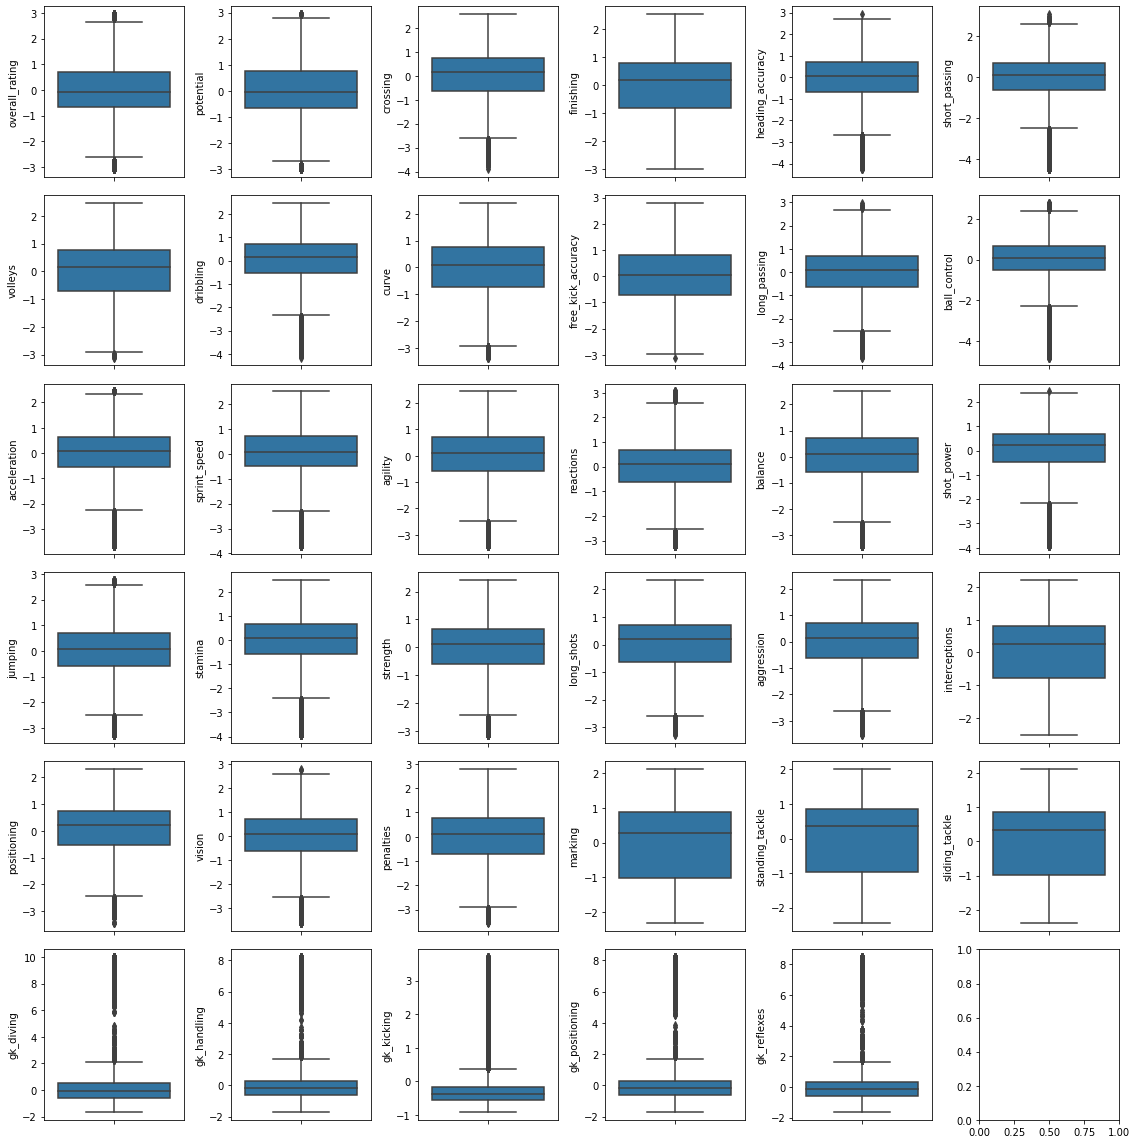

In [239]:
fig,ax3=plt.subplots(nrows=6,ncols=6)
fig.set_size_inches(16,16)
for i,j in enumerate(soccer_norm_data.select_dtypes(include = ['float64','int64'])):
    sns.boxplot(y=j,data=soccer_norm_data,ax=ax3[int(i/6)][i%6])
fig.tight_layout()

 Distributions of all the numercal features after removing the outliers.

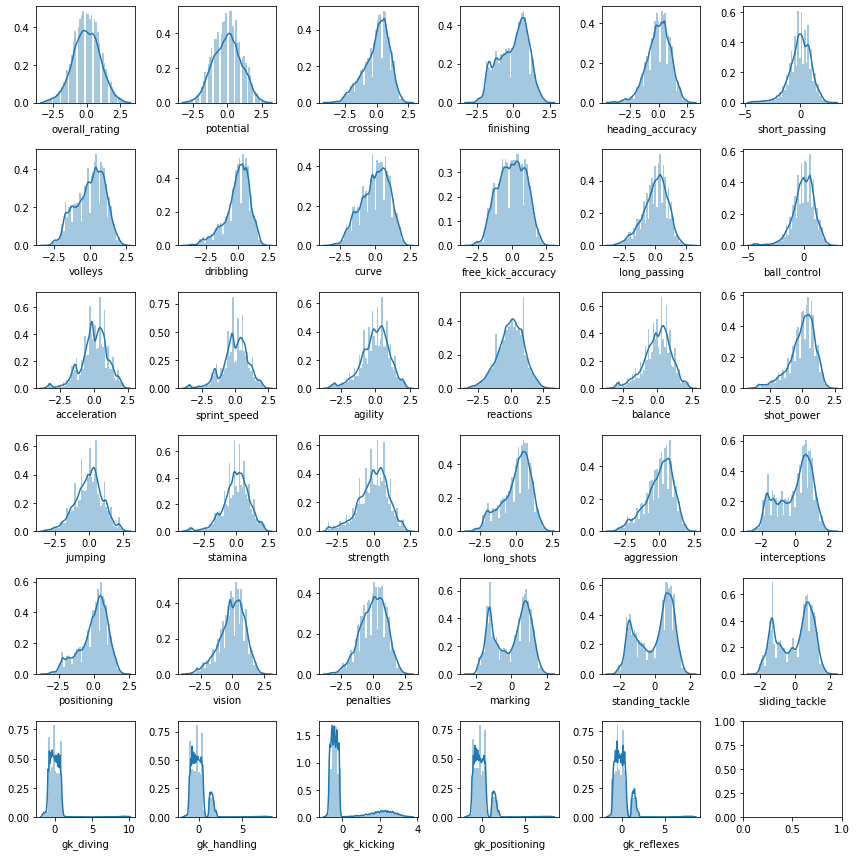

In [244]:
fig,ax7=plt.subplots(ncols=6,nrows=6,figsize=(12,12))
for i,j in enumerate(soccer_norm_data.select_dtypes(include=['int','float'])):
    sns.distplot(soccer_norm_data.loc[:,j],hist=True,ax=ax7[int(i/6)][i%6])
fig.tight_layout()

In [250]:
soccer_norm_data_corr=soccer_norm_data.corr()
#soccer_norm_data_corr['overall_rating'].sort_values(ascending=False)
#Features correlation with the target variable(Overall_rating) sorted in descending order.

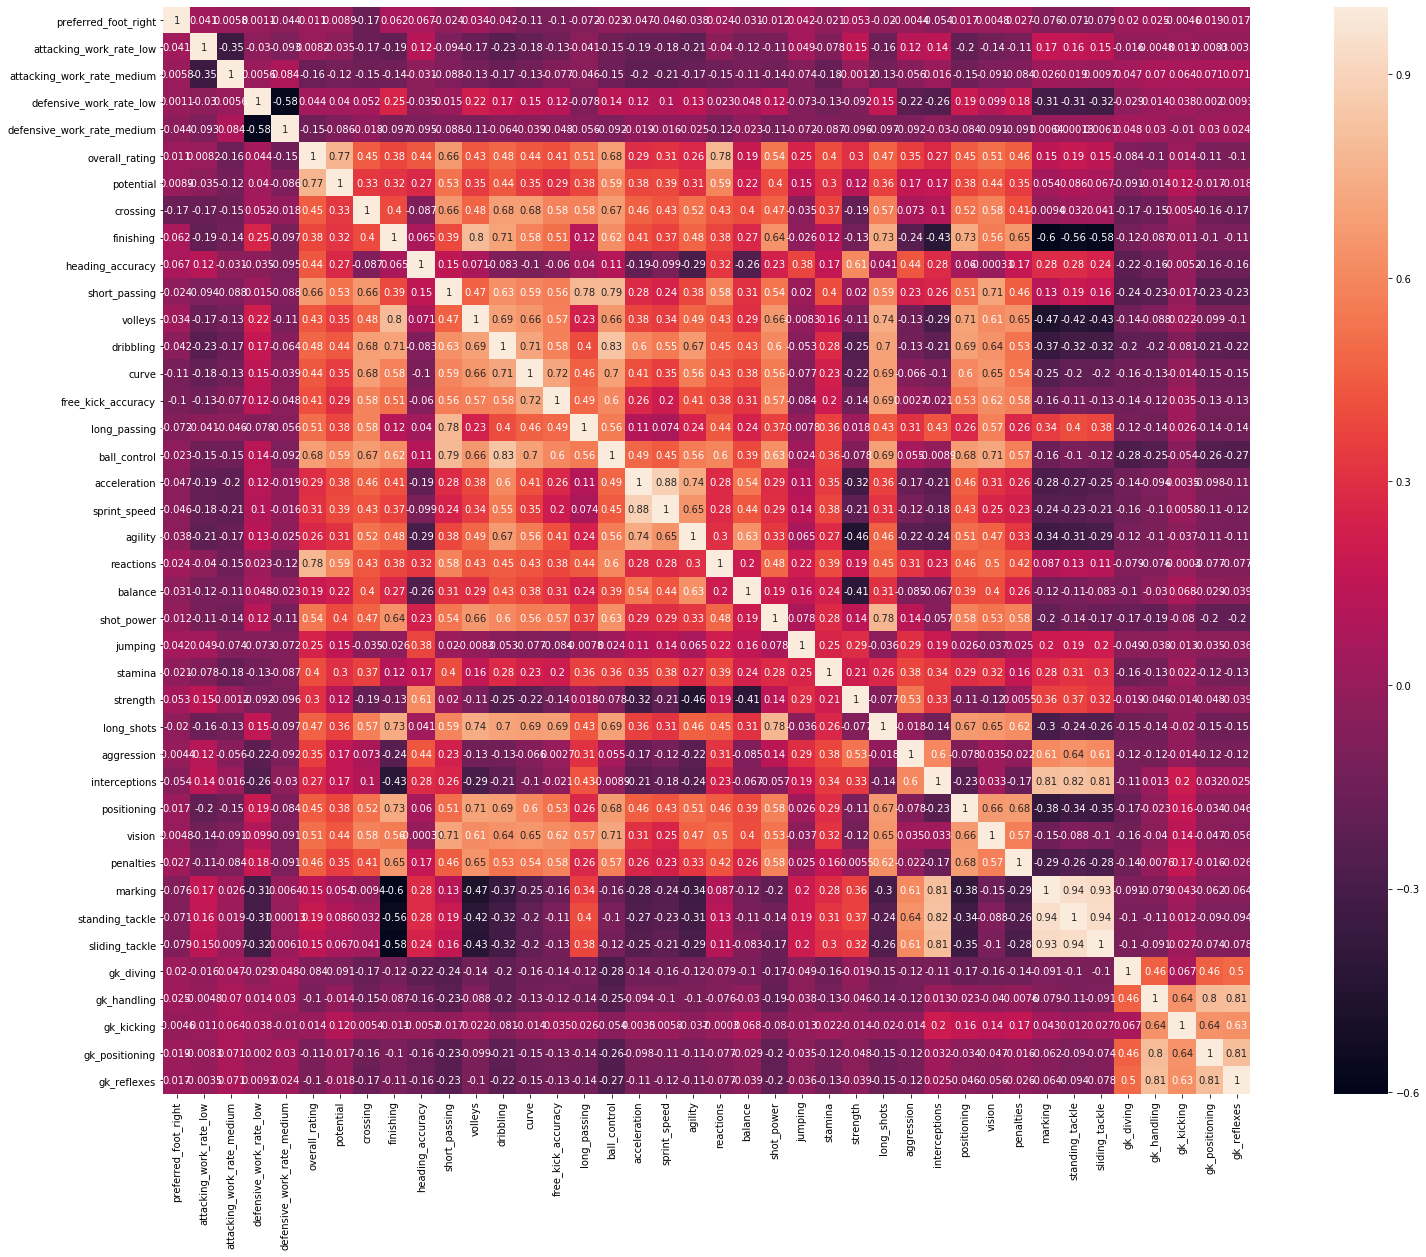

In [251]:
fig,ax=plt.subplots(figsize=(30,20))
sns.heatmap(soccer_norm_data_corr,ax=ax,vmax=1,square=True,annot=True)

<h4>Bivariate Analysis</h4>
Every feature plotted against the target variable

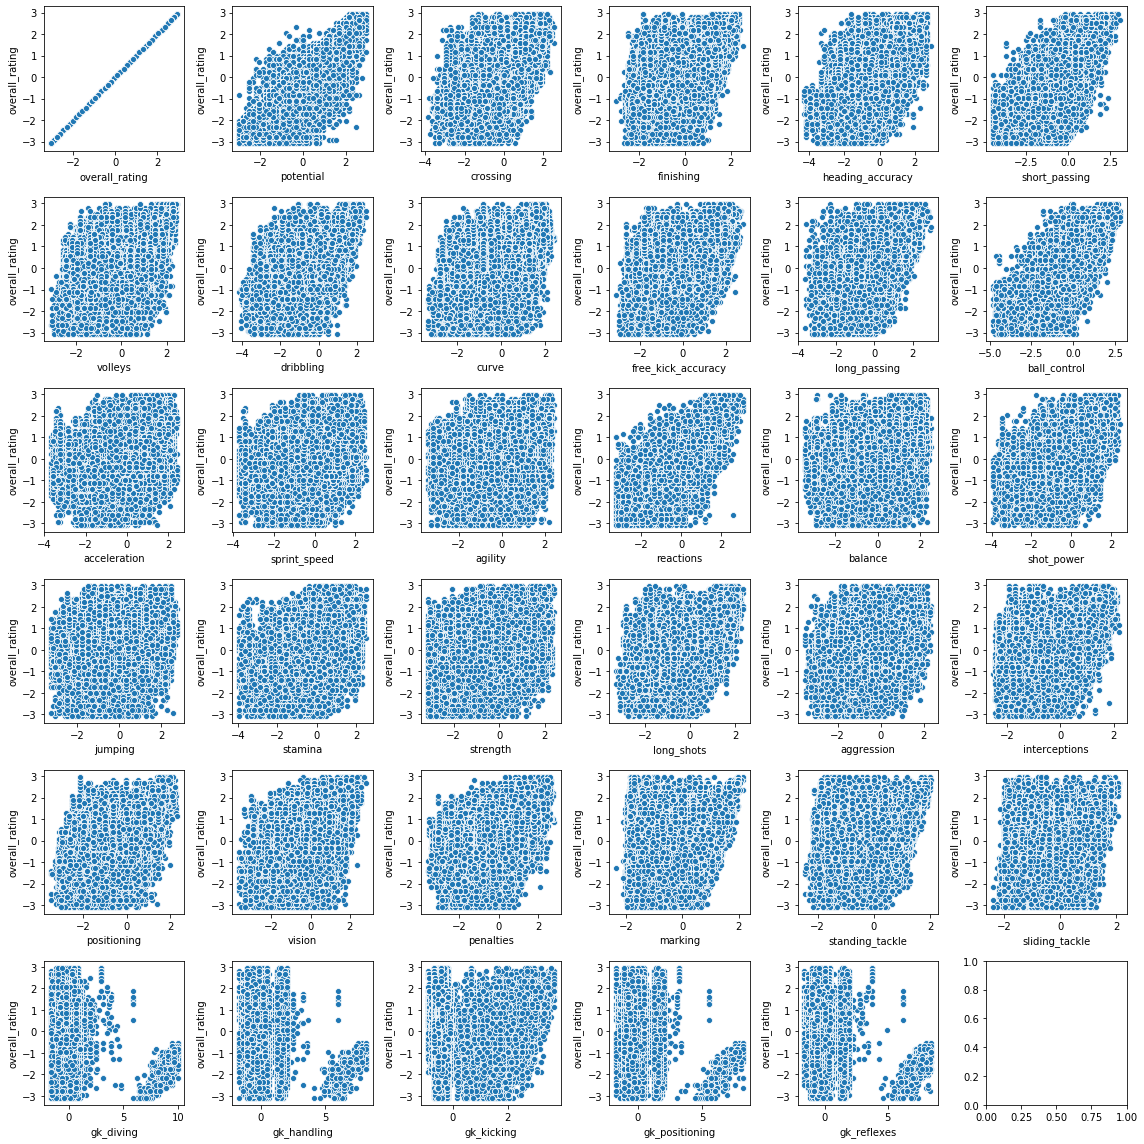

In [252]:
fig,ax9=plt.subplots(nrows=6,ncols=6,figsize=(16,16))
for i,j in enumerate(soccer_data_in_norm.select_dtypes(include=['int64','float64'])):
    sns.scatterplot(x=j,y='overall_rating',data=soccer_data_in_norm,ax=ax9[int(i/6)][i%6])
fig.tight_layout()

Plotting the highly correlated variable:reactions against the target variable

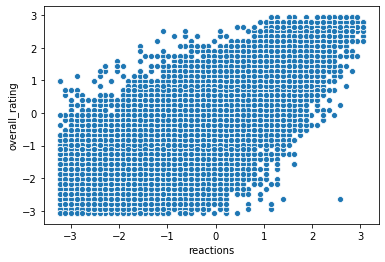

In [257]:
sns.scatterplot(x='reactions',y='overall_rating',data=soccer_data_in_norm)

In [258]:
#Removing varoables that are least correlated with overall_rating
low_corr_cols=[]
for key in dict(soccer_norm_data_corr['overall_rating']):
        
    if dict(soccer_norm_data_corr['overall_rating'])[key]  < 0.2:
        low_corr_cols.append(key)
#soccer_norm_data_rem_low_corr_cols=soccer_norm_data.drop(columns=low_corr_cols)
#soccer_norm_data_rem_low_corr_cols
low_corr_cols

['preferred_foot_right',
 'attacking_work_rate_low',
 'attacking_work_rate_medium',
 'defensive_work_rate_low',
 'defensive_work_rate_medium',
 'balance',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes']

<h6>MultiCollinearity Analysis</h6>

In [259]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [260]:
vif=pd.DataFrame()

In [261]:
vif['VIF Factor']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [262]:
vif['features']=X.columns

In [263]:
vif

,VIF Factor,features
0,3.181684,preferred_foot_right
1,1.297326,attacking_work_rate_low
2,3.407917,attacking_work_rate_medium
3,1.662877,defensive_work_rate_low
4,3.471596,defensive_work_rate_medium
5,2.229579,potential
6,3.141746,crossing
7,5.502860,finishing
8,2.530734,heading_accuracy
9,5.545763,short_passing


In [264]:
high_vif_features=['marking','standing_tackle','sliding_tackle']
#grouping the features having high VIF factor.

In [265]:
X=X.drop(columns=high_vif_features)
#To remove Multicollinearity among the features we should remove the features having high VIF(Variation Inflaiton Factor)

In [266]:
X.shape
#After removing the features having high VIF

(123660, 36)

<h2>Modelling</h2>


<h4>LinerRegression</h4>

In [267]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,mean_squared_error,r2_score

In [268]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)


In [269]:
X_train.head()

,preferred_foot_right,attacking_work_rate_low,attacking_work_rate_medium,defensive_work_rate_low,defensive_work_rate_medium,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
70274,1,0,0,0,1,-0.020810,-0.268932,1.379902,1.172554,0.592180,0.938695,0.577262,0.873199,-0.217356,0.021505,0.845818,0.008371,0.059085,-0.149122,0.445294,-0.596332,0.820471,-0.301294,-0.192109,0.742569,0.574666,0.284866,-0.344672,1.050014,0.403139,0.898941,0.851509,0.306789,-0.168771,-0.777406,-0.449075
46624,0,0,1,1,0,1.539867,1.221517,1.437432,0.614404,1.187325,1.367799,1.813703,1.001443,1.417662,1.091201,1.528627,1.359070,1.095708,1.406438,0.919652,1.211313,0.897189,0.884363,-0.192109,0.038375,1.143106,0.002149,-1.761065,1.240679,1.568406,1.631591,0.314951,-0.622419,-0.486316,0.151572,-0.003674
66233,1,0,1,0,1,-2.361827,-2.398145,-1.611682,-2.893965,-2.879504,-2.678040,-2.768401,-3.102370,-1.726603,0.268358,-4.128933,-1.162235,-1.354491,-1.877522,-2.400851,-1.715350,-2.171529,-1.388146,-1.149297,-1.281990,-2.014897,-0.987362,-0.181242,-2.636189,-2.937296,-0.566360,6.217092,6.346642,2.371592,7.893057,7.271210
122887,0,0,1,0,1,0.759529,2.002229,0.516945,-0.422159,1.187325,0.816093,1.013653,1.642664,1.606318,0.926632,1.040906,0.548651,0.718755,0.801498,0.326705,0.436608,0.513600,-1.190536,1.147955,-0.137674,1.143106,1.345056,0.962768,1.050014,1.490722,0.972206,-0.937019,-1.087023,-0.274619,-0.932236,-0.449075
78564,0,0,0,0,1,-0.489014,0.369832,0.977189,0.614404,-1.292449,0.509590,-0.077324,0.424344,-0.091585,-0.060780,-0.617344,0.188464,0.341801,-0.667642,-0.622010,0.006216,0.130010,-0.795317,-0.957860,0.566520,0.511506,0.567583,-2.414785,0.096686,-0.373707,-0.859420,0.136098,-0.312683,-0.274619,-0.312917,0.144793


In [270]:
y_train.head()

,overall_rating
70274,0.692716
46624,1.749667
66233,-2.176152
122887,1.447681
78564,-0.515229


In [271]:
linear=LinearRegression()

In [272]:
model_fit=linear.fit(X_train,y_train)

In [273]:
model_fit.intercept_

array([0.01205284])

In [274]:
model_fit.coef_

array([[ 0.00425405,  0.17845547, -0.00890769,  0.0451626 , -0.03556218,
         0.34164192,  0.03428218,  0.03112727,  0.13881079,  0.06620572,
         0.0023761 , -0.03037579,  0.02903015,  0.02940088,  0.04000576,
         0.20406084,  0.0300925 ,  0.01745539, -0.02136142,  0.280249  ,
         0.01838933,  0.02777653,  0.0252639 , -0.0129355 ,  0.1057037 ,
        -0.03904448,  0.02986557,  0.05724621, -0.0143094 , -0.02251845,
         0.04423895,  0.09307948,  0.00129917, -0.05987221,  0.01015711,
         0.02518331]])

In [275]:
(np.transpose(model_fit.coef_))

array([[ 0.00425405],
       [ 0.17845547],
       [-0.00890769],
       [ 0.0451626 ],
       [-0.03556218],
       [ 0.34164192],
       [ 0.03428218],
       [ 0.03112727],
       [ 0.13881079],
       [ 0.06620572],
       [ 0.0023761 ],
       [-0.03037579],
       [ 0.02903015],
       [ 0.02940088],
       [ 0.04000576],
       [ 0.20406084],
       [ 0.0300925 ],
       [ 0.01745539],
       [-0.02136142],
       [ 0.280249  ],
       [ 0.01838933],
       [ 0.02777653],
       [ 0.0252639 ],
       [-0.0129355 ],
       [ 0.1057037 ],
       [-0.03904448],
       [ 0.02986557],
       [ 0.05724621],
       [-0.0143094 ],
       [-0.02251845],
       [ 0.04423895],
       [ 0.09307948],
       [ 0.00129917],
       [-0.05987221],
       [ 0.01015711],
       [ 0.02518331]])

In [276]:
X_coeff=pd.concat([pd.DataFrame(X_train.columns,columns=['X_variable']),pd.DataFrame(np.transpose(model_fit.coef_),columns=['Coefficients'])],axis=1)
X_coeff

,X_variable,Coefficients
0,preferred_foot_right,0.004254
1,attacking_work_rate_low,0.178455
2,attacking_work_rate_medium,-0.008908
3,defensive_work_rate_low,0.045163
4,defensive_work_rate_medium,-0.035562
5,potential,0.341642
6,crossing,0.034282
7,finishing,0.031127
8,heading_accuracy,0.138811
9,short_passing,0.066206


In [277]:
y_predict=model_fit.predict(X_test)

In [278]:
y_predict

array([[-0.10971689],
       [-1.60345125],
       [-1.07295158],
       ...,
       [ 0.04193304],
       [-1.39663469],
       [ 0.44204935]])

In [306]:
residual=y_test-y_predict
#residual

,overall_rating
32047,-0.254519
21713,0.484251
34059,-0.348235
15769,-0.108896
74950,0.340160
12616,-0.172603
97837,-0.052685
84107,0.215601
78077,-0.080577
99485,0.135158


In [280]:
rmse = mean_squared_error(y_test, y_predict)

In [281]:
rmse

0.15350337414429455

In [282]:
X_test.shape

(37098, 36)

In [283]:
r2 = r2_score(y_test,y_predict)

In [284]:
r2

0.8459870864703449

In [285]:
vif=1/(1-r2)
vif
#Check for Multicollinearity among the features available in  the dataset

6.492962032092528

In [286]:

n=37098
k=36
adjusted_r2=(1-((1-r2)*((n-1)/(n-(k+1)))))
adjusted_r2

0.8458374827120257

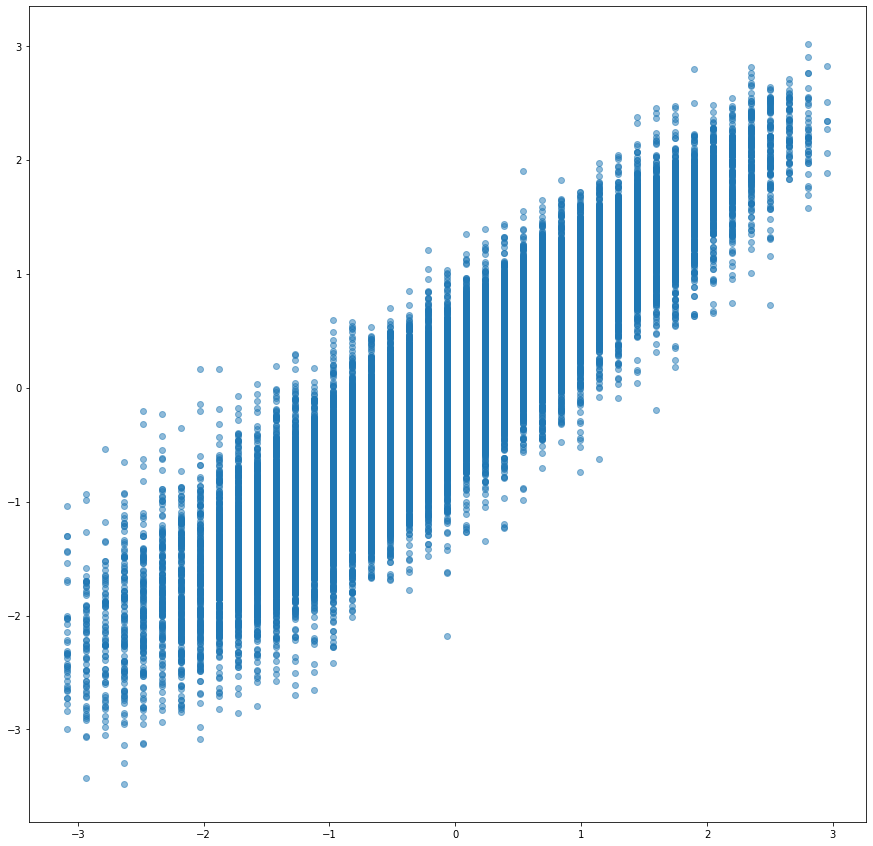

In [287]:
plt.figure(figsize=(15,15))
plt.scatter(x=y_test,y=y_predict,alpha=0.5)
#plt.plot(x=y_test,y=y_predict,marker='-')
#plt.legend()
plt.show()

<h6>Check for Homoskedasticity</h6>

Text(0.5, 1.0, 'Residual Plot')

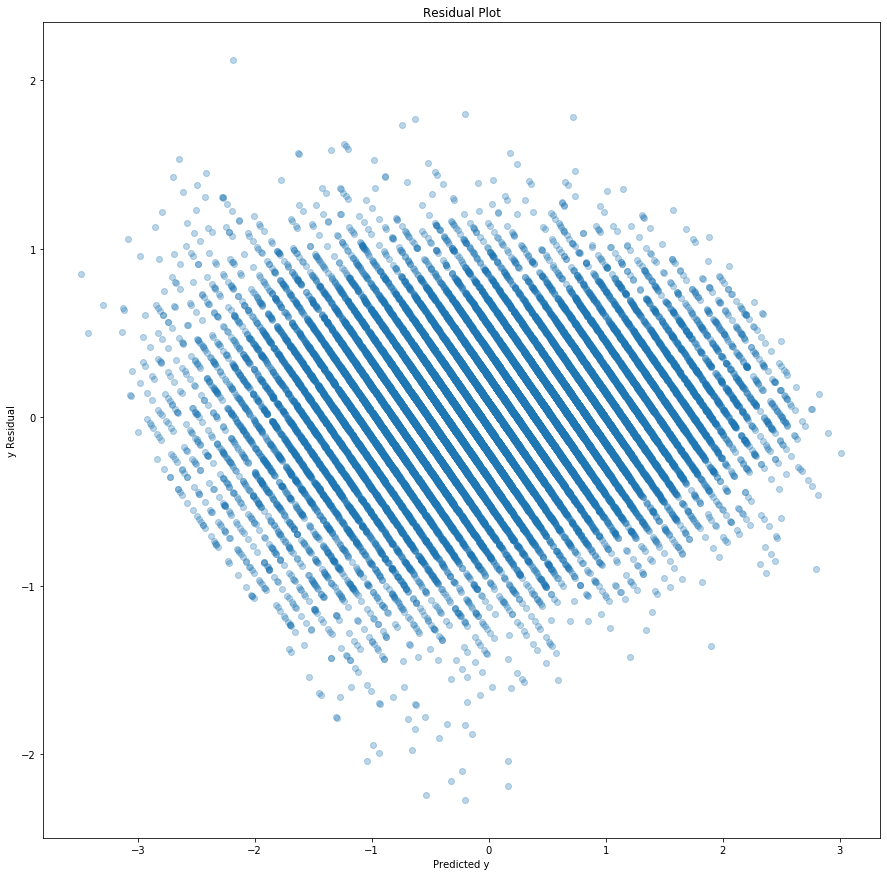

In [300]:
plt.figure(figsize=(15,15))
plt.scatter(y_predict,residual,alpha=0.3)
plt.xlabel('Predicted y')
plt.ylabel('y Residual')
#plt.xlim([-4, 4])
#plt.ylim([-3, 3])
plt.title('Residual Plot')



In [7]:
fig,ax11=plt.subplots(nrows=5,ncols=6,figsize=(16,16))
for i,j in enumerate(X_test.select_dtypes(include=['int64','float64'])):
    sns.scatterplot(x=j,y=residual['overall_rating'],data=X_test,ax=ax11[int(i/5)][i%6])
fig.tight_layout()
#Each feature plotted against the residual

NameError: name 'plt' is not defined

<function matplotlib.pyplot.show(*args, **kw)>

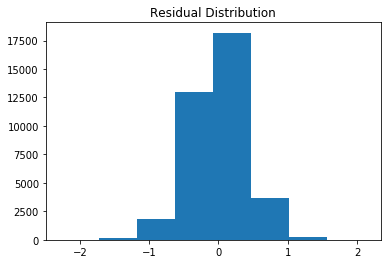

In [307]:
plt.hist(residual['overall_rating'],bins=8)
plt.title('Residual Distribution')
plt.show

In [308]:
residual.min()

overall_rating   -2.27187
dtype: float64

In [309]:
residual.max()

overall_rating    2.119888
dtype: float64

In [310]:
residual_range=residual.max()-residual.min()

In [311]:
residual_range

overall_rating    4.391759
dtype: float64

In [312]:
y_predict_range=y_predict.max()-y_predict.min()
y_predict_range

6.497542556709885

In [313]:
residual_range_per=residual_range/y_predict_range
residual_range_per

overall_rating    0.675911
dtype: float64

<h6>Ridge Regression using GridSearchCV</h6>

In [314]:
from sklearn.linear_model import Ridge

In [315]:
params={'alpha':[55,50,45,40,35,30,25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}

In [316]:
ridge=Ridge()

In [317]:
from sklearn.model_selection import GridSearchCV

In [318]:
grid_search_ridge=GridSearchCV(estimator=ridge,param_grid=params)

In [319]:
grid_search_ridge.fit(X_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [55, 50, 45, 40, 35, 30, 25, 10, 4, 2, 1.0,
                                   0.8, 0.5, 0.3, 0.2, 0.1, 0.05, 0.02, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [320]:
grid_search_ridge.best_score_

0.847194836500966

In [321]:
grid_search_ridge.best_params_

{'alpha': 30}

In [324]:
y_predict_ridge=grid_search_ridge.predict(X_test)

In [330]:
residual_ridge=y_test-y_predict_ridge
#residual_ridge

In [326]:
rmse_ridge=mean_squared_error(y_test,y_predict_ridge)
rmse_ridge

0.15350415735059011

In [327]:
r2_ridge=r2_score(y_test,y_predict_ridge)
r2_ridge

0.8459863006642729

<h6>Lasso Regression</h6>

In [2]:
from sklearn.linear_model import Lasso

In [3]:
lasso=Lasso()

In [4]:
lasso_params={'alpha':[1e-5,1e-4,1e-3,1e-2,1e-1,0,0.2,0.4,0.5,0.7,0.8,1,3,5,7,1]}

In [5]:
grid_search_lasso=GridSearchCV(estimator=lasso,param_grid=lasso_params)

NameError: name 'GridSearchCV' is not defined

In [ ]:
grid_search_lasso.fit(X_train,y_train)

In [ ]:
grid_search_lasso.best_score_

In [ ]:
grid_search_lasso.best_params_

In [ ]:
y_predict_lasso=grid_search_lasso.predict(X_test)

In [6]:
r2_lasso=r2_score(y_test,y_predict)
r2_lassos

NameError: name 'r2_score' is not defined

StatsModel-Linear Regression

In [ ]:
import statsmodels.api as sm

In [ ]:
ols=sm.OLS(y_train,X_train).fit()

In [ ]:
y_predict_ols=ols.predict(X_test)

In [ ]:
residual_ols=(y_test-y_predict_ols)

Decission Tree Regressor:

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
decission_tree_reg=DecisionTreeRegressor()

In [ ]:
dt_params = {"criterion": ["mse"],
              "min_samples_split": [80,100,200,500],
              "max_depth": [15,20],
              "min_samples_leaf": [10,20,30,40,50],
              "max_leaf_nodes": [100,500,1000],
              } 


In [ ]:
grid_search_dt=GridSearchCV(estimator=decission_tree_reg,param_grid=dt_params)

In [ ]:
grid_search_dt.fit(X_train,y_train)

In [ ]:
grid_search_dt.best_score_

In [ ]:
grid_search_dt.best_params_

In [ ]:
y_predict_dt=grid_search_dt.predict(X_test)

In [ ]:
dt_score=r2_score(y_test,y_predict_dt)
dt_score

RandomForest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
random_forest_reg=RandomForestRegressor()

In [ ]:
rf_params={"n_estimators":[500,600,700,800]
           ,  'n_jobs':[-1]
           }

In [ ]:
grid_search_rf=GridSearchCV(estimator=random_forest_reg,param_grid=rf_params)

In [ ]:
y_train.shape

In [ ]:
grid_search_rf.fit(X_train,y_train.values.ravel())

In [ ]:
grid_search_rf.best_score_

In [ ]:
grid_search_rf.best_params_

In [ ]:
y_predict_rf=grid_search_rf.predict(X_test)

In [ ]:
residual_rf=y_test-y_predict
#residual

In [ ]:
residual_range_rf=(residual_rf.max()-residual_rf.min())
residual_range_rf

In [ ]:
rf_score=r2_score(y_test,y_predict)
rf_score
#Validation on test data